In [1]:
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_20100\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Анализ датасетов

In [2]:
data = pd.read_csv('train.csv', sep=',', encoding="ISO-8859-1")

In [3]:
data

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
...,...,...,...,...,...
74062,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
74064,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33
74065,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00


In [4]:
data['id'].value_counts()

id
2         1
149832    1
149976    1
149974    1
149967    1
         ..
75758     1
75757     1
75754     1
75748     1
221473    1
Name: count, Length: 74067, dtype: int64

In [5]:
data_attribs = pd.read_csv('attributes.csv')

In [6]:
data_attribs

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel
...,...,...,...
2044798,224428.0,Pilot Bit Included,No
2044799,224428.0,Power Tool Product Type,Drill & Router Bits
2044800,224428.0,Shank Diameter,3/8 in
2044801,224428.0,Shank Style,Hex


# Конкатенация датасетов

In [7]:
list_values = data_attribs.groupby('product_uid')['value'].apply(list)
list_names = data_attribs.groupby('product_uid')['name'].apply(list)

In [8]:
data_attribs.drop_duplicates('product_uid', inplace=True)

In [9]:
data_attribs['name'] = list_names

In [10]:
data_attribs.drop(labels=['name', 'value'], axis=1, inplace=True)
processed_data_attribs = data_attribs.join(list_names, on='product_uid')
processed_data_attribs = processed_data_attribs.join(list_values, on='product_uid')

In [11]:
processed_data_attribs

,product_uid,name,value
0,100001.0,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...
15,100002.0,"[Application Method, Assembled Depth (in.), As...","[Brush,Roller,Spray, 6.63 in, 7.76 in, 6.63 in..."
50,100003.0,"[Built-in flange, Bullet01, Bullet02, Bullet03...","[Yes, Slightly narrower for tighter spaces, De..."
82,100004.0,"[Amperage (amps), Bullet01, Bullet02, Bullet03...","[8.56, Positive power tolerance (0 to +5-Watt)..."
107,100005.0,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k..."
...,...,...,...
2044680,224422.0,"[Assembled Depth (in.), Assembled Height (in.)...","[0.44 in, 1.5 in, 0.44 in, 2 piece per pack, B..."
2044711,224423.0,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Adjusts to fit shower openings with a minimum...
2044737,224424.0,"[Assembly Required, Bullet01, Bullet02, Bullet...","[No, Solid wood construction, only the side an..."
2044755,224425.0,"[Assembled Depth (in.), Assembled Height (in.)...","[49 in, 2 in, 20.5 in, Resists fading, stains ..."


In [12]:
processed_data_attribs['product_uid'].isna().value_counts()

product_uid
False    86263
True         1
Name: count, dtype: int64

In [13]:
processed_data_attribs[processed_data_attribs['product_uid'].isna()]

,product_uid,name,value
1929,NaN,NaN,NaN


In [14]:
processed_data_attribs.dropna(inplace=True)

In [15]:
processed_data_attribs['product_uid'] = processed_data_attribs['product_uid'].apply(int)

In [16]:
processed_data_attribs

,product_uid,name,value
0,100001,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...
15,100002,"[Application Method, Assembled Depth (in.), As...","[Brush,Roller,Spray, 6.63 in, 7.76 in, 6.63 in..."
50,100003,"[Built-in flange, Bullet01, Bullet02, Bullet03...","[Yes, Slightly narrower for tighter spaces, De..."
82,100004,"[Amperage (amps), Bullet01, Bullet02, Bullet03...","[8.56, Positive power tolerance (0 to +5-Watt)..."
107,100005,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k..."
...,...,...,...
2044680,224422,"[Assembled Depth (in.), Assembled Height (in.)...","[0.44 in, 1.5 in, 0.44 in, 2 piece per pack, B..."
2044711,224423,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Adjusts to fit shower openings with a minimum...
2044737,224424,"[Assembly Required, Bullet01, Bullet02, Bullet...","[No, Solid wood construction, only the side an..."
2044755,224425,"[Assembled Depth (in.), Assembled Height (in.)...","[49 in, 2 in, 20.5 in, Resists fading, stains ..."


In [17]:
full_data = data.merge(processed_data_attribs, on='product_uid', how='left')

In [18]:
full_data

,id,product_uid,product_title,search_term,relevance,name,value
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"[Application Method, Assembled Depth (in.), As...","[Brush,Roller,Spray, 6.63 in, 7.76 in, 6.63 in..."
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k..."
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k..."
...,...,...,...,...,...,...,...
74062,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00,"[Assembled Depth (in.), Assembled Height (in.)...","[9.5 in, 49 in, 32 in, Yes, Holds 216 Blu-rays..."
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00,"[Actual Color Temperature (K), Average Life (h...","[2700, 2500, 2.5, Clear, Reflector, Flood and ..."
74064,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33,"[Application Type, Assembled Depth (in.), Asse...","[Entry, 2.9 in, 12.9 in, 3 in, Adjustable, Use..."
74065,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00,"[Bullet01, Bullet02, Bullet03, Bullet04, Decor...","[Indoor and outdoor use, Finished in Dark Bron..."


In [19]:
full_data.drop('id', axis=1, inplace=True)

In [20]:
full_data

,product_uid,product_title,search_term,relevance,name,value
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"[Application Method, Assembled Depth (in.), As...","[Brush,Roller,Spray, 6.63 in, 7.76 in, 6.63 in..."
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k..."
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k..."
...,...,...,...,...,...,...
74062,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00,"[Assembled Depth (in.), Assembled Height (in.)...","[9.5 in, 49 in, 32 in, Yes, Holds 216 Blu-rays..."
74063,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00,"[Actual Color Temperature (K), Average Life (h...","[2700, 2500, 2.5, Clear, Reflector, Flood and ..."
74064,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33,"[Application Type, Assembled Depth (in.), Asse...","[Entry, 2.9 in, 12.9 in, 3 in, Adjustable, Use..."
74065,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00,"[Bullet01, Bullet02, Bullet03, Bullet04, Decor...","[Indoor and outdoor use, Finished in Dark Bron..."


<Axes: >

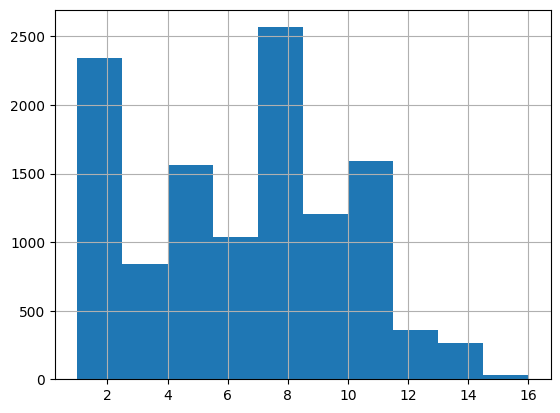

In [21]:
import matplotlib
full_data['search_term'].value_counts().hist()

In [22]:
full_data['occurrences'] = full_data.groupby('search_term')['search_term'].transform('size')

In [23]:
full_data

,product_uid,product_title,search_term,relevance,name,value,occurrences
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...,11
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"[Bullet01, Bullet02, Bullet03, Bullet04, Bulle...",[Versatile connector for various 90° connectio...,7
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"[Application Method, Assembled Depth (in.), As...","[Brush,Roller,Spray, 6.63 in, 7.76 in, 6.63 in...",8
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k...",8
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,"[Bath Faucet Type, Built-in Water Filter, Bull...","[Combo Tub and Shower, No, Includes the trim k...",10
...,...,...,...,...,...,...,...
74062,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00,"[Assembled Depth (in.), Assembled Height (in.)...","[9.5 in, 49 in, 32 in, Yes, Holds 216 Blu-rays...",10
74063,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00,"[Actual Color Temperature (K), Average Life (h...","[2700, 2500, 2.5, Clear, Reflector, Flood and ...",2
74064,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33,"[Application Type, Assembled Depth (in.), Asse...","[Entry, 2.9 in, 12.9 in, 3 in, Adjustable, Use...",3
74065,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00,"[Bullet01, Bullet02, Bullet03, Bullet04, Decor...","[Indoor and outdoor use, Finished in Dark Bron...",11


In [24]:
full_data['occurrences'].value_counts()

occurrences
9     10827
8     10544
10     9830
7      8736
11     6721
6      6228
5      4340
12     4284
4      2780
3      2511
13     2483
2      1886
1      1399
14      994
15      360
16      144
Name: count, dtype: int64

<Axes: >

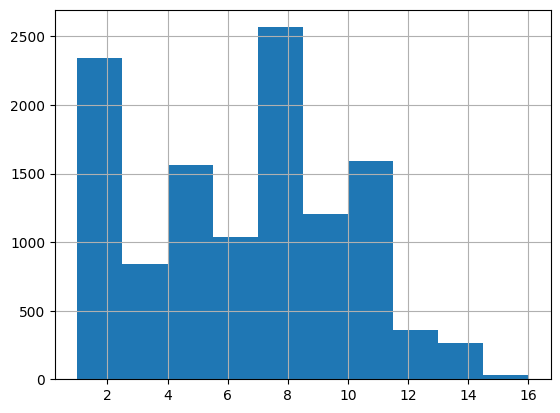

In [185]:
import matplotlib
full_data['search_term'].value_counts().hist()

In [308]:
full_data.to_csv('full_data.csv')